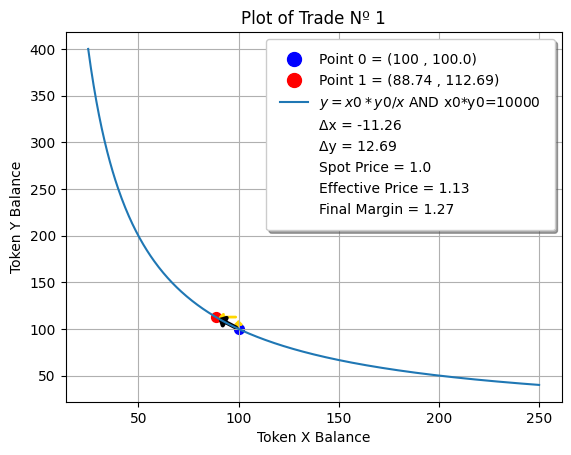

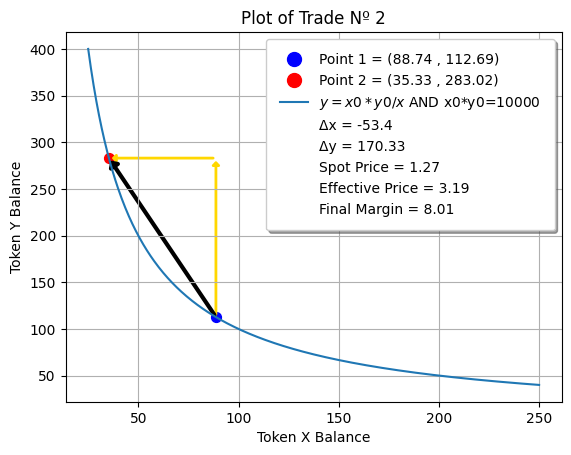

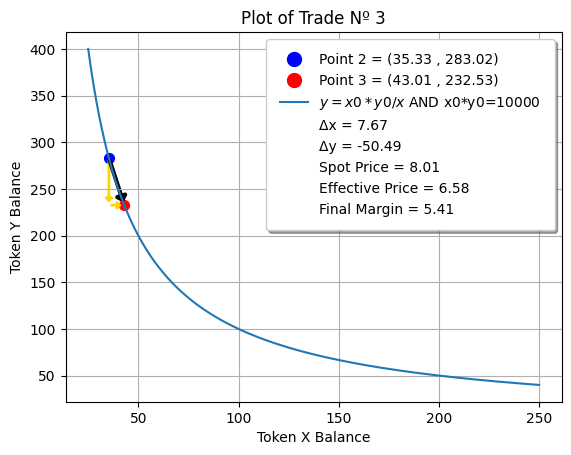

In [2]:
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.patches import FancyArrowPatch

# The number of trades we want to simulate
NUMBER_OF_TRADES=3

# Let's assume the invariant = 100000
# Let's plot the AMM function || y= (x0*y0)/ x
def f(xplot):
    global invariant
    
    invariant = 10000 # Invariant = x0 * y0
    return invariant/xplot

# Generate x values from 50 to 250 in 200 equally spaced points in the curve => discrethe time => python can't generate function plots in continuous time
xplot = np.linspace(25, 250, 500)
# Compute y values for each x
yplot = f(xplot)


# Initilialize AMM
def initializeAMM(): # x0 and y0
    # global variables
    global x, y, xtrade, ytrade
    
    # Invariant = x0 * y0
    x = 100 #x0
    y = invariant/x #y0
    xtrade = [] # It is a list of lists and each list contains contains the values of x before and after the trade => [[x_Trade1], [x_Trade2], [x_Trade3], ...]... => x_Trade1 = [x0,x1] , x_Trade2 = [x1,x2] => ...
    ytrade = [] # It is a list of lists and each list contains contains the values of y before and after the trade => [[y_Trade1], [y_Trade2], [y_Trade3], ...]... => x_Trade2 = [y0,y1] , y_Trade2 = [y1,y2] => ...

# Let's initialize the trades
def trade():
    global x, y, xtrade, ytrade
    # nextx and nexty are auxiliars to store the previous state 
    nextx=0 # x(n+1) != x(n) => On the first trade, x(n) = x(0)
    nexty=0 # y(n+1) != y(n) => On the first trade, y(n) = y(0)
    while nextx<=0 and nexty<=0: # Restrict trades that would leave a negative balance of either token X or token Y
        # We are using x as the independent variable => autonomous difference equation => iterative map => loop loop loop
        # Assumption about the trade => trade is a single sample of a random variable that follows a normal distribution with avg=0 and std=50
        deltax = norm.rvs( 
            0, #Average of distribution
            30, #STD of distribution
            1 #Sample size
        )  
        nextx = x + deltax[0] # x(n+1) = x(n) + deltx
        nexty = y*x / nextx # y(n+1) = y(n)*x(n)/ x(n+1) => numerator is the same as the invariant => 10000
    
    # Appending each trade to the corresponding variable
    xtrade.append([x,nextx])
    ytrade.append([y,nexty])
    
    # Replacing x(n) for x(n+1) and y(n) for y(n+1)
    x, y = nextx, nexty # On the next trade, these values will be used as x(n) and y(n)
    

# Let's trade
initializeAMM() # Calling function to initialize AMM
for t in list(range( NUMBER_OF_TRADES )): # Iterate through the number of trades we want to simulate
    trade() # Calling function to trade


# Let's iterate through the trades that took place
for i in list(range(NUMBER_OF_TRADES)): 
    for j in list(range(2)): # Each trade contains 2 values
        if j == 0: # Before the trade
            plt.scatter(
                xtrade[i][j], 
                ytrade[i][j],
                color = 'blue', 
                s=50, 
            
            )         
        else: # After the trade 
            plt.scatter(
                xtrade[i][j], 
                ytrade[i][j],
                color = 'red',
                s=50,    
            )
    
    # LEGEND
    # Create the plot and customized legend
    line = plt.plot(
        xplot, 
        yplot, 
        label=r"$y=x0*y0/x$ AND x0*y0={}".format(invariant))[0]
    
    # Customized legend by adding individual lines
    point_one = mlines.Line2D(
        [], 
        [], 
        color='none', 
        marker='o', 
        markerfacecolor='blue', 
        markeredgecolor='blue', 
        markersize=10, 
        label= "Point {} = ({} , {})".format( # Coordinates of the point before the trade
                i,
                round(xtrade[i][0],2),
                round(ytrade[i][0],2)
    ))
    
    point_two = mlines.Line2D(
        [], 
        [], 
        color='none', 
        marker='o', 
        markerfacecolor='red', 
        markeredgecolor='red', 
        markersize=10,
        label= "Point {} = ({} , {})".format( # Coordinates of the point after the trade
                i+1,
                round(xtrade[i][1],2),
                round(ytrade[i][1],2)
    ))
    
    
    spot_price = mlines.Line2D(
        [], 
        [], 
        color='none', 
        label='Spot Price = {}'.format( # Calculating the spot price
            round(ytrade[i][0]/xtrade[i][0],2)
    ))
    
    effective_price = mlines.Line2D(
        [], 
        [], 
        color='none', 
        label='Effective Price = {}'.format( # Calculating the effective price
            abs(round((ytrade[i][1]-ytrade[i][0]) / (xtrade[i][1]-xtrade[i][0]),2))
    ))
    
    final_margin = mlines.Line2D(
        [], 
        [], 
        color='none', 
        label='Final Margin = {}'.format( # Calculating the final margin
            abs(round(ytrade[i][1]/(xtrade[i][1]),2))
    ))
    
    x_increase = mlines.Line2D(
        [], 
        [], 
        color='none', 
        label='Δx = {}'.format( # Calculating the delta x
            round(xtrade[i][1]-xtrade[i][0],2)
    ))
    
    y_increase = mlines.Line2D(
        [], 
        [], 
        color='none', 
        label='Δy = {}'.format( # Calculating the delta y
            round(ytrade[i][1]-ytrade[i][0],2)
    ))
    
    # Adding title and labels
    plt.title("Plot of Trade Nº {}".format(i+1))
    plt.xlabel("Token X Balance")
    plt.ylabel("Token Y Balance")
    
    # Adding the arrows the match the trades
    arrow1 = FancyArrowPatch(
        (xtrade[i][0], ytrade[i][0]), 
        (xtrade[i][0], ytrade[i][1]), 
        arrowstyle='-|>,head_width=2,head_length=2', 
        color='gold',
        linewidth=2
    )
    
    arrow2 = FancyArrowPatch(
        (xtrade[i][0], ytrade[i][1]), 
        (xtrade[i][1], ytrade[i][1]), 
        arrowstyle='-|>,head_width=2,head_length=2', 
        color='gold',
        linewidth=2
    )
    
    arrow3 = FancyArrowPatch(
        (xtrade[i][0], ytrade[i][0]), 
        (xtrade[i][1], ytrade[i][1]), 
        arrowstyle='-|>,head_width=3,head_length=3', 
        color='black',
        linewidth=3
    )
    
    # Get the current axes and add the arrow through patches
    ax = plt.gca()
    ax.add_patch(arrow1)
    ax.add_patch(arrow2)
    ax.add_patch(arrow3)
    
    # Add a grid to the plot
    plt.grid(True)

    # Compose the legend
    plt.legend(
        handles=[
            point_one,
            point_two,
            line,
            x_increase,
            y_increase,
            spot_price, 
            effective_price,
            final_margin
        ], 
        loc='best',
        shadow=True,            # Shadow for the box
        fancybox=True,          # Rounded corners
        borderpad=1,            # Padding around the border
        title_fontsize='12',    # Font size for the title
        fontsize='10',          # Font size for labels
        framealpha=1            # Transparency of the background
    )
    
    # Display the plot
    plt.show()

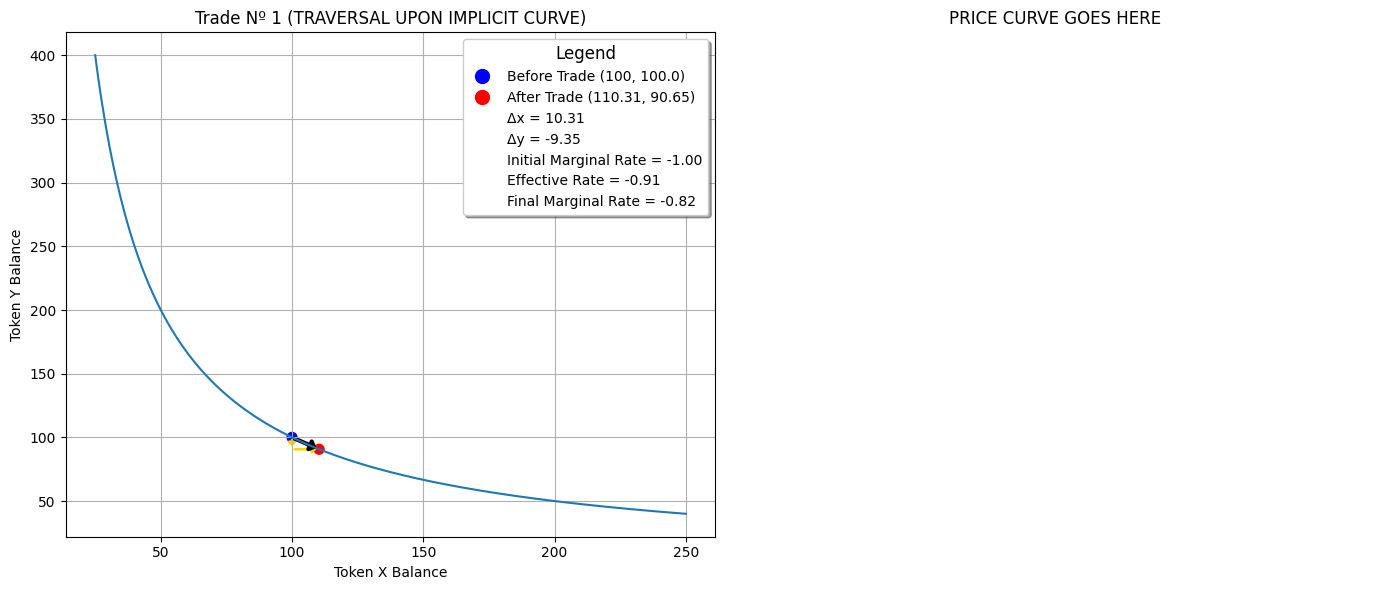

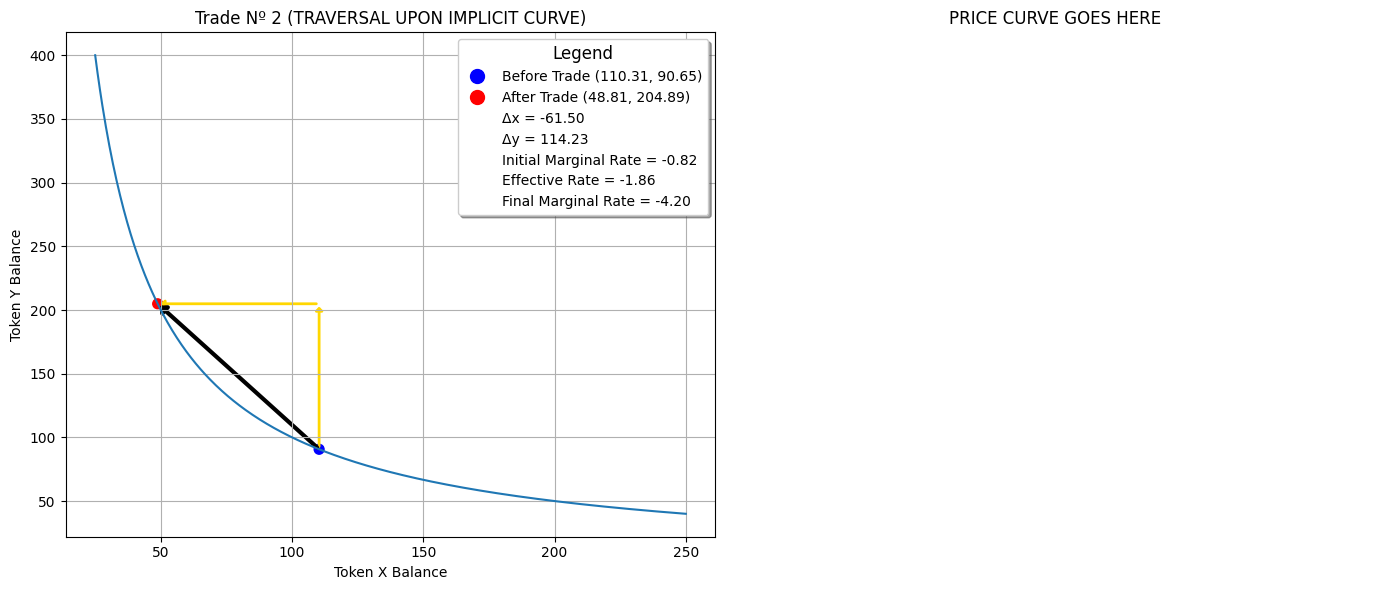

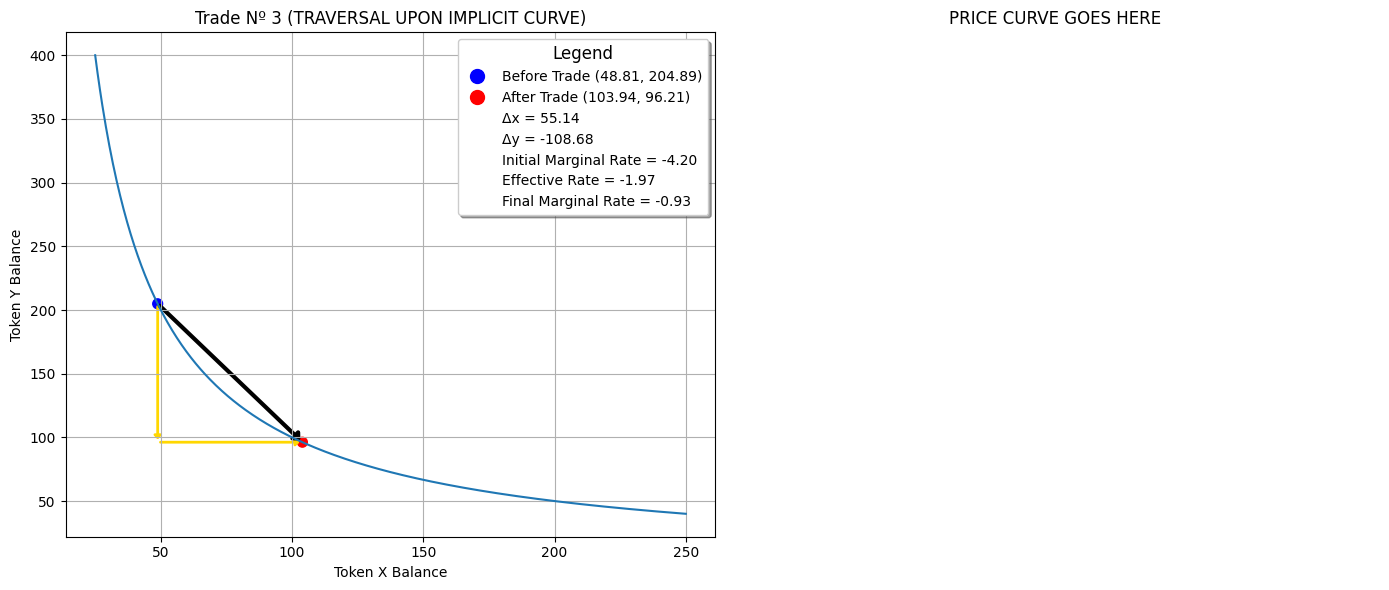

In [24]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.patches import FancyArrowPatch

# The number of trades we want to simulate
NUMBER_OF_TRADES = 3
invariant = 10000  # Invariant = x0 * y0

def f(xplot):
    return invariant / xplot

xplot = np.linspace(25, 250, 500)
yplot = f(xplot)

def initializeAMM():
    global x, y, xtrade, ytrade
    x = 100
    y = invariant / x
    xtrade = []
    ytrade = []

def trade():
    global x, y, xtrade, ytrade
    nextx = nexty = 0
    while nextx <= 0 or nexty <= 0:
        deltax = norm.rvs(loc=0, scale=30, size=1)
        nextx = x + deltax[0]
        nexty = invariant / nextx if nextx != 0 else 0
    xtrade.append([x, nextx])
    ytrade.append([y, nexty])
    x, y = nextx, nexty

initializeAMM()
for _ in range(NUMBER_OF_TRADES):
    trade()

# Creating subplots for each trade
for i in range(NUMBER_OF_TRADES):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # First subplot with the actual trades
    ax1.plot(xplot, yplot)
    ax1.scatter([xtrade[i][0], xtrade[i][1]], [ytrade[i][0], ytrade[i][1]], color=['blue', 'red'], s=50)
    ax1.set_title(f"Trade Nº {i + 1} (TRAVERSAL UPON IMPLICIT CURVE)")
    ax1.set_xlabel("Token X Balance")
    ax1.set_ylabel("Token Y Balance")
    ax1.grid(True)
    
    # Adding arrows
    arrow1 = FancyArrowPatch((xtrade[i][0], ytrade[i][0]), (xtrade[i][0], ytrade[i][1]), arrowstyle='-|>,head_width=2,head_length=2', color='gold', linewidth=2)
    arrow2 = FancyArrowPatch((xtrade[i][0], ytrade[i][1]), (xtrade[i][1], ytrade[i][1]), arrowstyle='-|>,head_width=2,head_length=2', color='gold', linewidth=2)
    arrow3 = FancyArrowPatch((xtrade[i][0], ytrade[i][0]), (xtrade[i][1], ytrade[i][1]), arrowstyle='-|>,head_width=3,head_length=3', color='black', linewidth=3)
    ax1.add_patch(arrow1)
    ax1.add_patch(arrow2)
    ax1.add_patch(arrow3)

    # Detailed legend as in the original code
    legend_elements = [
        mlines.Line2D([], [], color='none', marker='o', markerfacecolor='blue', markeredgecolor='blue', markersize=10, label=f'Before Trade ({round(xtrade[i][0],2)}, {round(ytrade[i][0],2)})'),
        mlines.Line2D([], [], color='none', marker='o', markerfacecolor='red', markeredgecolor='red', markersize=10, label=f'After Trade ({round(xtrade[i][1],2)}, {round(ytrade[i][1],2)})'),
        mlines.Line2D([], [], color='none', label=f'Δx = {xtrade[i][1] - xtrade[i][0]:.2f}'),
        mlines.Line2D([], [], color='none', label=f'Δy = {ytrade[i][1] - ytrade[i][0]:.2f}'),
        mlines.Line2D([], [], color='none', label=f'Initial Marginal Rate = {- ytrade[i][0]/xtrade[i][0]:.2f}'),
        mlines.Line2D([], [], color='none', label=f'Effective Rate = {- abs((ytrade[i][1] - ytrade[i][0]) / (xtrade[i][1] - xtrade[i][0])):.2f}'),
        mlines.Line2D([], [], color='none', label=f'Final Marginal Rate = {- ytrade[i][1]/xtrade[i][1]:.2f}'),
    ]
    ax1.legend(handles=legend_elements, loc='best', shadow=True, fancybox=True, title='Legend', title_fontsize='12', fontsize='10', framealpha=1)

    # Second subplot empty
    ax2.set_title("PRICE CURVE GOES HERE")
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

